/home/vagrant/jupyter/ZgoubiWork/ESRF
0.0013
48.6905201033


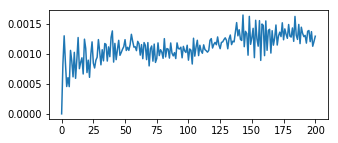

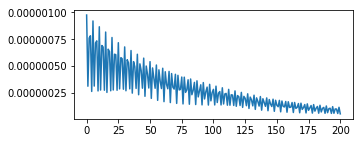

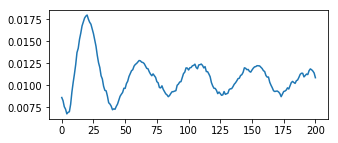

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import math

FL=os.getcwd()
print FL
dm1val,xval,yval,IPASS=np.loadtxt('%s/%s'%(FL,'zgoubi.fai'),skiprows=4,usecols=(8,9,11,37),unpack=True)
xvalmeter=xval/100
yvalmeter=yval/100

numpart=20
numturns=201

epsx=65e-9
betax=26
print(np.sqrt(epsx*betax))
Trev=2.711e-6 #revolution time (s)
taux=0.132e-3 #horizontal damping time (s)
nx=taux/Trev
print(nx)

xvalsturn={}
yvalsturn={}
dm1valsturn={}
xrms=np.zeros(numturns)
yrms=np.zeros(numturns)
dm1rms=np.zeros(numturns)

#print(xvalsturn.shape,xrms.shape,xvalmeter.shape)
for i in range(numturns):
    xvalsturn[i]=xvalmeter[numpart*i:numpart*(i+1)-1]
    yvalsturn[i]=yvalmeter[numpart*i:numpart*(i+1)-1]
    dm1valsturn[i]=dm1val[numpart*i:numpart*(i+1)-1]

    
#xrms=array(numturns)
for i in range(numturns):
    xrms[i]=math.sqrt(sum(xvalsturn[i]*xvalsturn[i])/numpart)
    yrms[i]=math.sqrt(sum(yvalsturn[i]*yvalsturn[i])/numpart)
    dm1rms[i]=math.sqrt(sum(dm1valsturn[i]*dm1valsturn[i])/numpart)

    
plt.figure(figsize=(5,2))
plt.plot(xrms,label=r'$x_{rms}$')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(yrms,label=r'$y_{rms}$')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(dm1rms,label=r'$\frac{dp}{p}_{rms}$')
plt.show()

In [10]:
xrms[200]

0.0012929845563276962